# Pulse Code Modulation

## Objective

This experiment aims:

1. To study and practice the Pulse Code Modulation.

## Introduction

In this experiment, you will practice Pulse Code Modulation.
Please refer to the textbook and lecture notes for theory part.

## Procedure

### Pulse Code Modulation: Generation

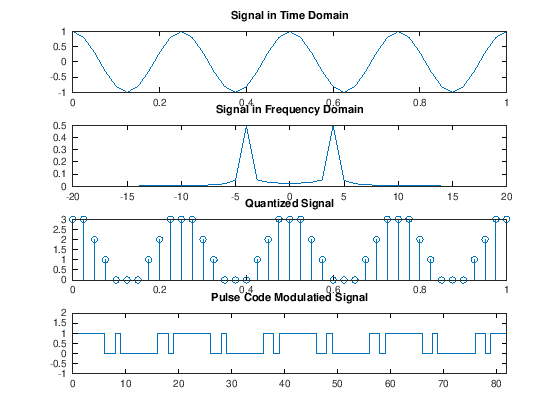

In [1]:
clear all;
fs   = 4e1;               % sampling frequency
t    = 0 : 1/fs : 1;      % time vector
n    = length(t);         % number of samples
f    = -fs/2 : 1 : fs/2;  % frequency vector
fm   = 4;                % message frequency
g    = cos(2*pi*fm*t);    % message signal
gm   = (g - min(g)) / max(g - min(g)); % Signal Scaling 
m    = 2;                 % Number of bits
l    = 2^m;               % Number of Levels in Quantizer
q    = round((l-1)*gm);   % Quantization
code = dec2bin(q)';       % Signal Encoding
code  = reshape(code,1,[]); % Binary Bit Encoding 

for i = 1 : m*n
    pcm(i) = str2num(code(i)); % Convert String to Number
end

figure();
subplot(411);plot(t,g); title('Signal in Time Domain')
subplot(412);plot(f,sig_spec(g)); title('Signal in Frequency Domain')
subplot(413);stem(t,q); title('Quantized Signal')
subplot(414);stairs(pcm);axis([0 m*n -1 2]); title('Pulse Code Modulatied Signal')

---

### Pulse Code Modulation: Digital-to-Analog Conversion

nq =  0.14826


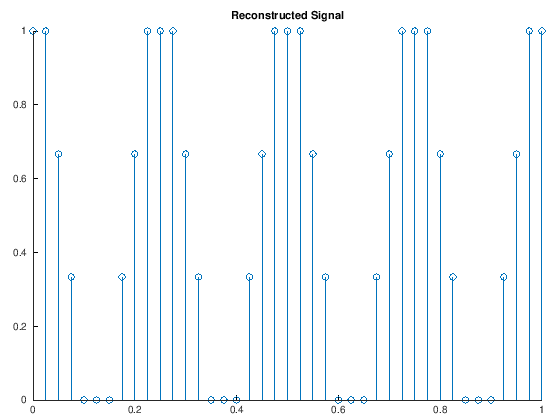

In [2]:
cv  = reshape(pcm,m,[])';   % Convert Codes to (m x l) Matrix
s   = bin2dec(num2str(cv)); % Analog Signal of Samples
gd  = s'/(l-1);             % Rescaling the Signal
nq  = sum((gm - gd).^2)     % Mean Squared Error

figure();
stem(t,gd);title('Reconstructed Signal')

----

Discussion

* Change signal frequency to 50 Hz, and comment on the results.
* Change number of bits to a higher number, what happen to the error?

nq =  0.0059917


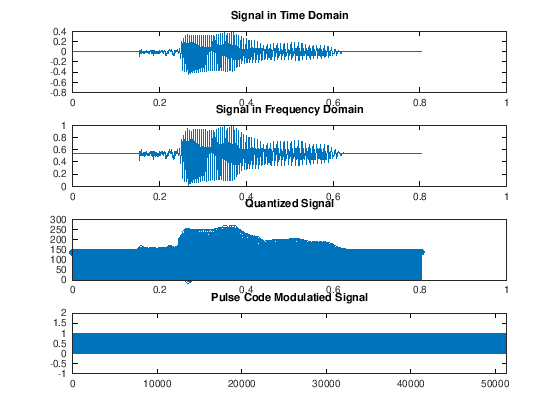

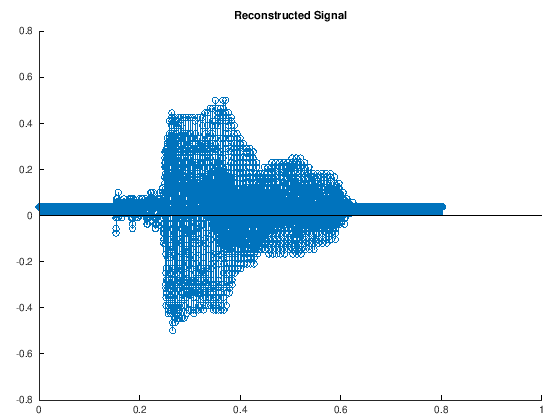

In [17]:
clear all;
[y, fs] = audioread('2.wav');
y   = y';
% modulation
n   =  length(y);
t   =  [1 : n]/fs;   
f    = -fs/2 : 1 : fs/2;  % frequency vector
gm   = (y - min(y)) / max(y - min(y)); % Signal Scaling 
m    = 8;                 % Number of bits
l    = 2^m;               % Number of Levels in Quantizer
q    = round((l-1)*gm);   % Quantization
code = dec2bin(q)';       % Signal Encoding
code  = reshape(code,1,[]); % Binary Bit Encoding 

for i = 1 : m*n
    pcm(i) = str2num(code(i)); % Convert String to Number
end

figure();
subplot(411);plot(t,y); title('Signal in Time Domain')
subplot(412);plot(t,gm); title('Signal in Frequency Domain')
subplot(413);stem(t,q); title('Quantized Signal')
subplot(414);stairs(pcm);axis([0 m*n -1 2]); title('Pulse Code Modulatied Signal')

cv  = reshape(pcm,m,[])';   % Convert Codes to (m x l) Matrix
s   = bin2dec(num2str(cv)); % Analog Signal of Samples
gd  = s'/(l-1);             % Rescaling the Signal
nq  = sum((gm - gd).^2)     % Mean Squared Error

figure();
stem(t,gd-0.5);title('Reconstructed Signal')
audiowrite('TrRec.wav',[y gd-0.5],fs);  % export audio vectors to a WAV file